### 練習

### ファイルの読込

In [75]:
import pandas as pd
df=pd.read_csv("../datafiles/Bank.csv")


### データの前処理１（標準化以外）

#### ダミー変数化

In [76]:
#調査
# print(df)

#文字列項目の検出
is_str = list()
for c in df.columns:
    # type(df[c].head[10])
    for v in df[c].head(10):
      if type(v) != int and type(v) != float:
          is_str.append(c)
          break
str_col_name=is_str
str_df = df[str_col_name]

#ダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

#数値列との結合
num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)


### データを訓練＆検証とテストの２つに分割

In [77]:
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,marital,education,default,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,False,False,...,False,False,unemployed,married,tertiary,no,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,True,False,...,False,False,blue-collar,divorced,secondary,no,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,False,False,...,False,False,management,single,tertiary,no,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,False,False,...,False,False,management,single,tertiary,no,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,False,False,...,False,False,services,single,secondary,no,yes,no,cellular,may


### 欠損値の補正

<Axes: >

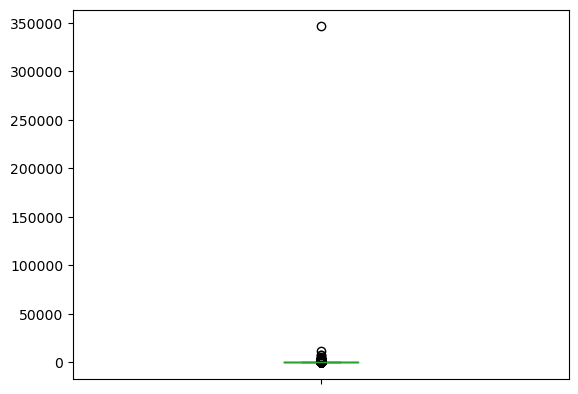

In [78]:
from sklearn.covariance import MinCovDet

#文字の入った列や欠損値のある行をdrop
num_df=train_val.drop(str_col_name,axis=1) #文字の列を取っ払う
num_df=num_df.drop('id',axis=1) #id列を取っ払う
num_df2=num_df.dropna() #欠損列を取っ払う

#マハラノビス距離を算出し外れ値を検出する
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")


In [79]:
#外れ値のあるインデックスを確認してその行・列を指定してdrop
no=dis[dis>300000].index
# print(no)
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)


Index([2561], dtype='int64')


In [85]:
### 欠損行を削除
# print(train_val2.tail(3))
not_nan_df = train_val2.dropna() #train_val2は外れ値が無いデータ
# print(not_nan_df.tail(3))
temp_t =not_nan_df[['duration']]
temp_x = not_nan_df.drop(str_col_name,axis=1)

